### Student Project 1 - Salary Analysis
  Tujuan : mengetahui hubungan lama pengalaman kerja dan jumlah gaji yang diterima 
  Dataset : Salary_dataset
  Methods : 
   * OLS (statsmodel)
   * Bayesian Regression (sklearn)
   * SVM Regression (sklearn)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Mount Dataset from google drive apabila menggungakan googlecolab
from google.colab import drive 
drive.mount('/content/drive')

In [3]:
# Load dataset
df = pd.read_csv('DA/datasets/Salary_dataset.csv')
df.head()

,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


### Exploratory Data Analyst

In [4]:
# untuk mengetahui shape dari data yang digunakan
df.shape

(30, 3)

In [5]:
# mengetahui data type dari setiap column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
# output dari hasil analisa statistik untuk setiap column
df.describe()

,No,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


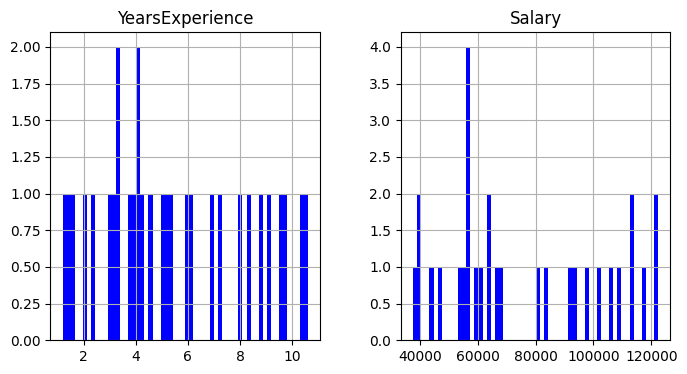

In [85]:
# plot histogram setiap column
df.hist(bins=60, figsize=(8,4),color='blue');plt.show()

<AxesSubplot: >

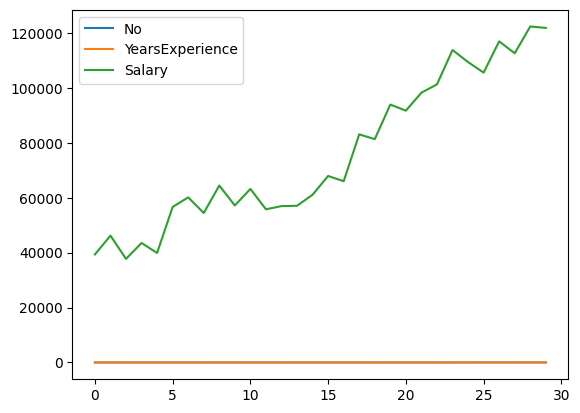

In [8]:
df.plot()

Text(0, 0.5, 'Salary')

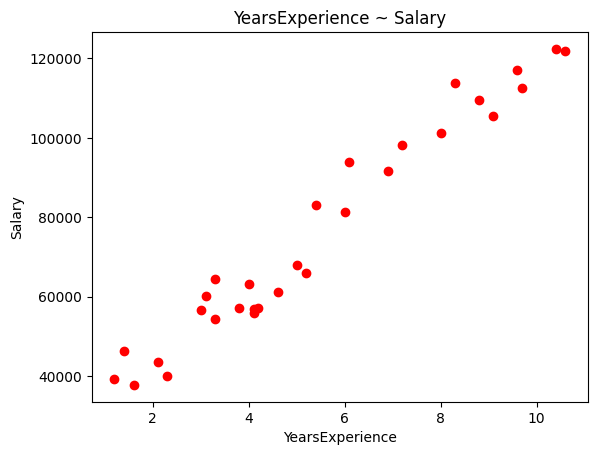

In [9]:
plt.show()                # plt.show() ini untuk menjalankan
a = plt.scatter(df['YearsExperience'], df['Salary'], color='red')         # scatter plot
plt.title("YearsExperience ~ Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

### Data Preprocessing

In [10]:
# Remove column name 'No'
df = df.drop(['No'], axis=1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [11]:
# pengecekan apakah terdapat data kosong 
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
# pengecekan apakah terdapat data yang terduplikat 
df.duplicated().sum()

0

<AxesSubplot: >

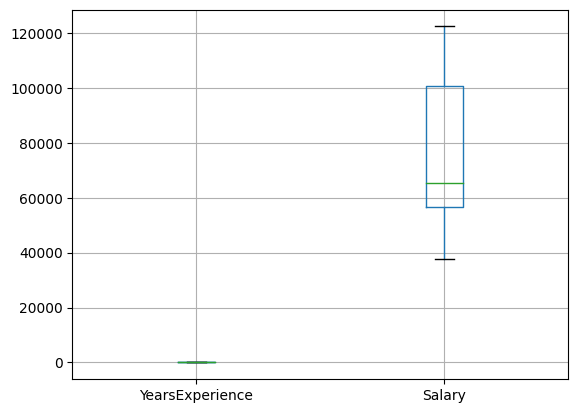

In [13]:
# plot distribusi data
df.boxplot()

In [14]:
#untuk melihat korelasi antar feature
corr = df.corr()

corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


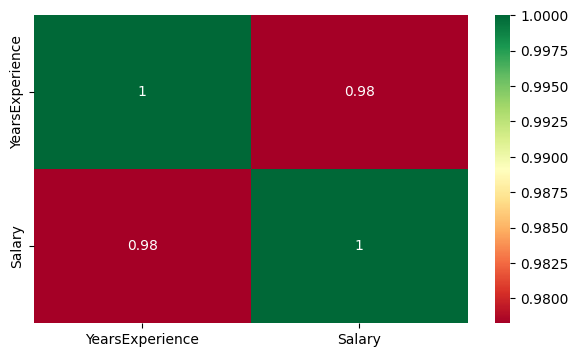

In [15]:
plt.subplots(figsize=(7,4))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

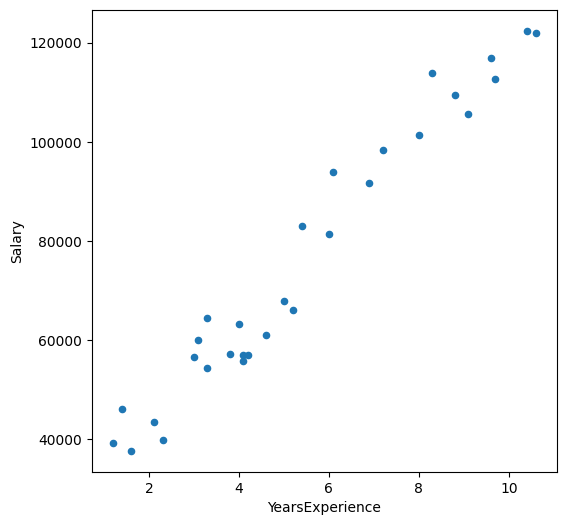

In [16]:
# plot untuk mengetahui sebaran data
df.plot(kind='scatter', x='YearsExperience', y='Salary', figsize=(6,6))

### Mehotd (OLS) --> statsmodel

In [17]:
import statsmodels.formula.api as smf

In [18]:
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [19]:
# Create Model OLS
salary_model = smf.ols(formula='Salary~YearsExperience', data=df).fit()

In [20]:
salary_model.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [21]:
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        11:22:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
salary_pred = salary_model.predict(pd.DataFrame(df['YearsExperience']))
salary_pred

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [23]:
# pakai fungsi rmse
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_val = rmse(df['Salary'], salary_pred)
rmse_val

5592.043608760659

Text(0.5, 1.0, 'Predicted Salary vs YearsExperience OLS')

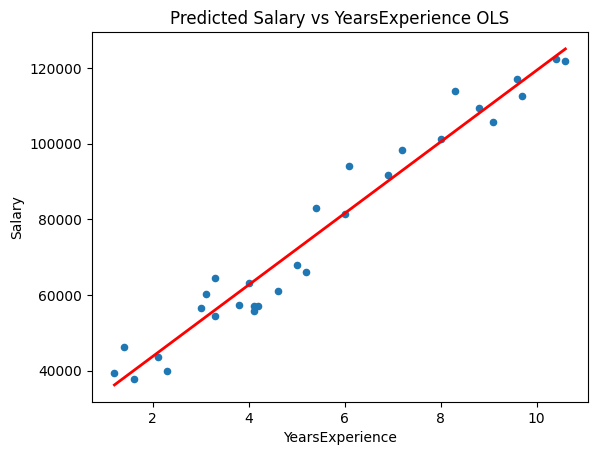

In [24]:
# Plot Salary yang diprediksi vs YearsExperience
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience OLS')


### Bayesian Regression (sklearn)

In [26]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}

RMSE: 5592.19


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

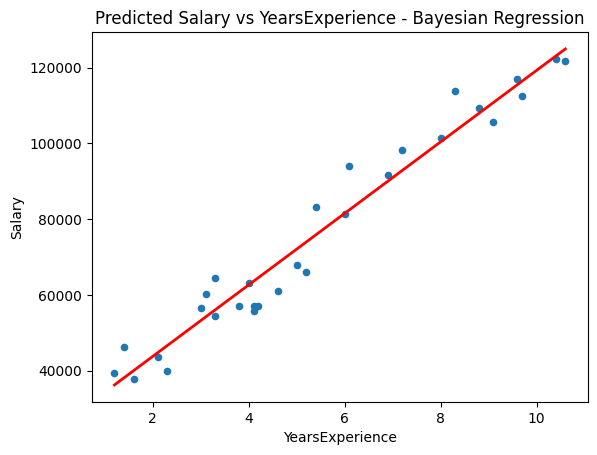

In [40]:
years = df['YearsExperience'].values.reshape(-1,1)
salary = df['Salary'].values.reshape(-1,1)

# Train model dengan training set
regr_bayes.fit(years, salary.ravel())

# Prediksi dengan data testing
salary_pred2 = regr_bayes.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred2, squared = False))

# Plot pengalaman yang diprediksi vs salary 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred2,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')


In [82]:
# trial test input manual
y = 12
salary_predM = regr_bayes.predict([[y]])[0]
salary_predM

138151.2107212573

### SVM Regression

In [59]:
from sklearn import svm

In [80]:
# buat objek SVM regression linear
regr_svm1 = svm.LinearSVR(max_iter=100)
regr_svm1.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 100,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

RMSE: 79636.99


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

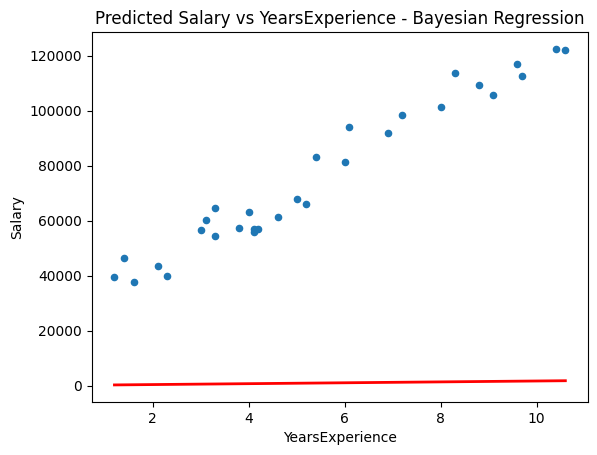

In [81]:

# Train modeldengan training set
regr_svm1.fit(years, salary.ravel())

# buat prediksi dengan data testing
salary_pred3 = regr_svm1.predict(years)

# RMSE
print('RMSE: %.2f'
      % mean_squared_error(salary, salary_pred3, squared = False))

# Plot salary yang diprediksi vs pengalaman 
df.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(df['YearsExperience']),salary_pred3,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')


In [79]:
y = 12
salary_predM = regr_svm1.predict([[y]])[0]
salary_predM

1978.7999999999993